In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

counter = 0


def moltosvg(mol, molSize=(450, 150), kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    global counter
    # with open(f"mol{counter}.svg", "w") as filehandle:
    #     filehandle.write(svg)
    # print(counter)
    counter += 1
    return svg


def render_svg(svg):
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return SVG(svg.replace("svg:", ""))

In [2]:
# import pydot
import networkx as nx
import matplotlib.pyplot as plt

graph_counter = 0


def render_graph(mol_gen, residues):
    # pydot_graph = nx.drawing.nx_pydot.to_pydot(mol_gen.graph)
    # return render_svg(pydot_graph.create_svg().decode("utf-8"))
    fig, ax = plt.subplots()
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    node_list = list(mol_gen.graph.nodes)
    node_res = [mol_gen.graph.nodes[n]["res"] for n in node_list]
    node_color = [colors[res] for res in node_res]
    labels = {}
    for n in mol_gen.graph.nodes:
        labels[n] = mol_gen.graph.nodes[n]["smiles"]
    layout = nx.kamada_kawai_layout(mol_gen.graph)
    drawing = nx.draw(mol_gen.graph, pos=layout, node_color=node_color, ax=ax, labels=labels)
    global graph_counter
    # fig.savefig(f"g{graph_counter}.pdf")
    # print(f"g{graph_counter}")
    graph_counter += 1
    return plt.show()

#### Helper function to generate and visualize bigSMILES strings

In [3]:
from bigsmiles_gen import System, mol_prob, Molecule

# Consistent random numbers also across calls
rng = np.random.default_rng(42)


def big_smiles_gen(string):
    global rng
    # Generate the abstract python object, parsing bigSMILES
    ext = Molecule(big)
    # Generate molecules according to extension
    mol = ext.generate(rng=rng)
    # Draw said molecule
    print(mol.smiles)
    # print(mol_prob.get_ensemble_prob(mol.smiles, ext)[0])

    return render_svg(moltosvg(mol.get_mol()))


def big_smiles_graph(string):
    global rng
    # Generate the abstract python object, parsing bigSMILES
    ext = Molecule(big)
    # Generate molecules according to extension
    mol = ext.generate(rng=rng)
    mol.add_graph_res(ext.residues)
    # Draw said molecule
    print(mol.smiles)
    # print(mol_prob.get_ensemble_prob(mol.smiles, ext)[0])

    return render_graph(mol, ext.residues)

# Polyesters 
## Di-Carboxyl Acids with 2-5 middle C total Mw 500

BigSMILES:

In [5]:
big = "OOC{[$][$]C(=O)C[$][$]}|uniform(120, 720)|COO"
big

'OOC{[$][$]C(=O)C[$][$]}|uniform(120, 720)|COO'

### Explanation

- `OOC` just normal SMILES for how the first initial group looks like
- `{....}` stochastic object, here just one carbon that is repeated
- `{[$]` and `[$]}` terminal descriptors, how does the stochastic object connect with the pre- and suffix
- `[$]C[$]` one C to repeat, with a bond in front and one at the end
- `|uniform(12, 72)|` extension detailing that the stochastic object is between 12 and 72 g/mol heavy
- `COO` suffix of the molecule
- `.|500|` extension detailing that the total system component of this as a min Mw of 500 g/mol


O=C(CCC(=O)CC(=O)C(=O)CC(=O)CC(=O)CC(=O)CC(=O)CCC(=O)C(=O)CCC(=O)CC(=O)C(=O)CCC(=O)C(=O)CCOO)COO


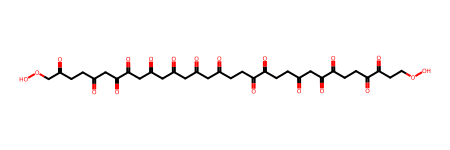

In [6]:
# Plot the first generated molecule
big_smiles_gen(big)

You can also render the graph of connected monomers.
In this case, we don't draw the atoms, but the connected monomers. This can be handy to visualize bigger molecules.

O=C(CCC(=O)CC(=O)C(=O)CCC(=O)C(=O)CC(=O)CC(=O)CCOO)CC(=O)COO


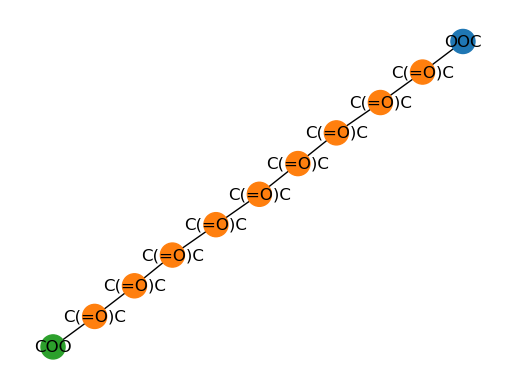

In [7]:
big_smiles_graph(big)

O=C(CCC(=O)CC(=O)CC(=O)CC(=O)C(=O)CC(=O)CCC(=O)C(=O)CC(=O)CCC(=O)CC(=O)CC(=O)COO)CC(=O)COO


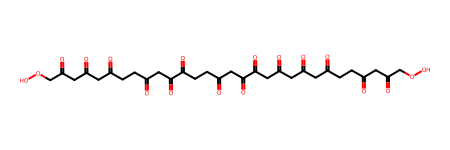

In [8]:
# Generate the second generated molecule
big_smiles_gen(big)

Notice how the repeated C are different because of the stochastic object

## Di-ols with 2-5 middle C total Mw 500

In [9]:
big = "OC{[$][$]C[$][$]}|schulz_zimm(80, 72)|CO"
big

'OC{[$][$]C[$][$]}|schulz_zimm(80, 72)|CO'

OCCCCCCO


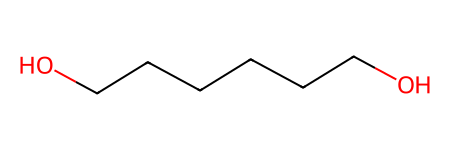

In [10]:
big_smiles_gen(big)

OCCCCCCCCO


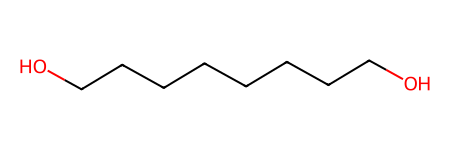

In [11]:
big_smiles_gen(big)

OCCCCCCCO


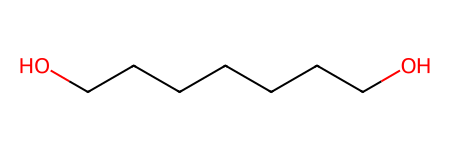

In [12]:
big_smiles_gen(big)

## Di-ols with 2-5 middle Cyclohexane ring total Mw 500

In [13]:
big = "OC{[$][$]C([$])C1CCCCC1[$]}|uniform(84, 420)|CO"
big

'OC{[$][$]C([$])C1CCCCC1[$]}|uniform(84, 420)|CO'

OCC(C1CCCCC1)C(CO)C1CCCCC1


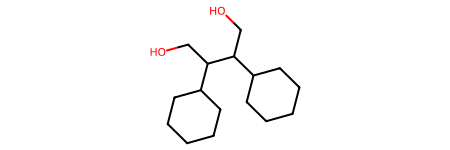

In [14]:
big_smiles_gen(big)

OCC(C1CCCCC1)C(C1CCCCC1)C(C1CCCCC1)C(C1CCCCC1)C(CO)C1CCCCC1


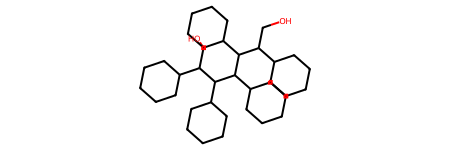

In [15]:
big_smiles_gen(big)

# Polyamides
## Di-Carboxylic Acids

In [16]:
big = "NC{[$][$]C[$][$]}|gauss(60, 24)|COO"
big

'NC{[$][$]C[$][$]}|gauss(60, 24)|COO'

NCCCOO


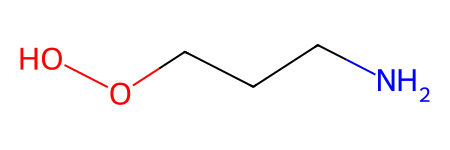

In [17]:
big_smiles_gen(big)

NCCCCCCCOO


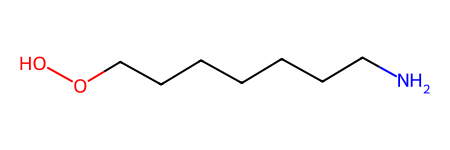

In [18]:
big_smiles_gen(big)

## Diamines

In [19]:
big = "NC{[$][$]C[$][$]}|gauss(60,24)|CN"
big

'NC{[$][$]C[$][$]}|gauss(60,24)|CN'

NCCCCCN


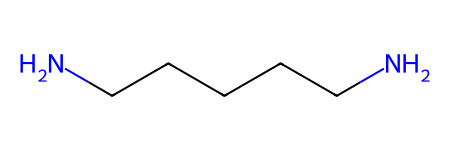

In [20]:
big_smiles_gen(big)

NCCCCCCCN


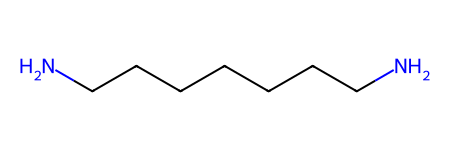

In [21]:
big_smiles_gen(big)

## New: Reaction of diol with di-acid

In [22]:
big = "NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C[$][$]}|uniform(12, 72)|CO"
big

'NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C[$][$]}|uniform(12, 72)|CO'

NCCCCCCCOOCCCCCCCCO


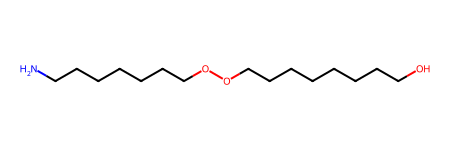

In [23]:
big_smiles_gen(big)

NCCCCOOCCCCCO


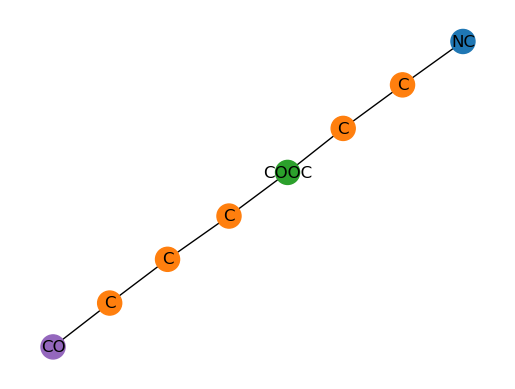

In [24]:
big_smiles_graph(big)

NCCCCCCCOOCCCCCCCO


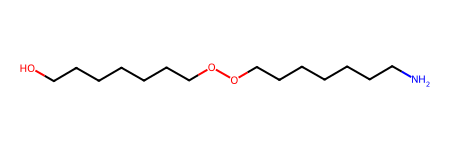

In [25]:
big_smiles_gen(big)

## Same diol and di-acid reaction, but with phenyl ring

In [26]:
big = "NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C([$])C1CCCCC1[$]}|uniform(50, 250)|CO"
big

'NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C([$])C1CCCCC1[$]}|uniform(50, 250)|CO'

NCCCCCOOCC(CO)C1CCCCC1


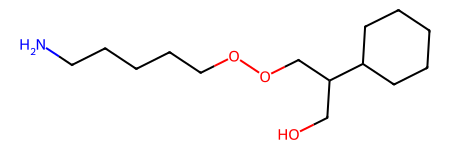

In [27]:
big_smiles_gen(big)

NCCCCOOCC(C1CCCCC1)C(CO)C1CCCCC1


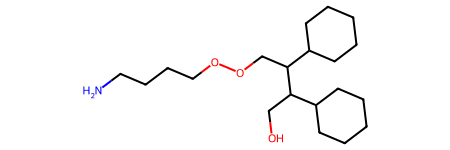

In [28]:
big_smiles_gen(big)

# New! Polyolefins, because a '=' remains

## CH2=CH-(CH2)nCH3  where n varies from 1 to 5

In [29]:
big = "C=C{[$][$]C[$][$]}|uniform(12,60)|C"
big

'C=C{[$][$]C[$][$]}|uniform(12,60)|C'

C=CCCC


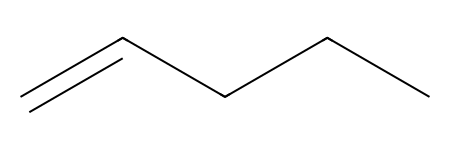

In [30]:
big_smiles_gen(big)

C=CCCC


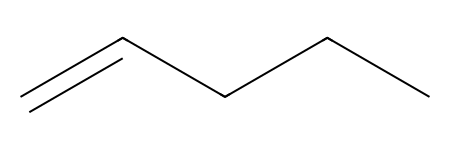

In [31]:
big_smiles_gen(big)

## CH2-CH-(CH2)n-CH=CH2 where n varies from 1 to 3

In [32]:
big = "CC{[$][$]C[$][$]}|uniform(12, 36)|C=C"
big

'CC{[$][$]C[$][$]}|uniform(12, 36)|C=C'

C=CCCCCC


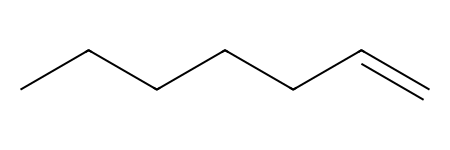

In [33]:
big_smiles_gen(big)

C=CCCCC


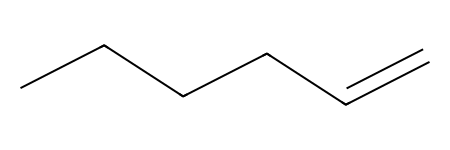

In [34]:
big_smiles_gen(big)

## Classic diblock PS-b-P2VP

In [35]:
big = "[H]{[<][<]C([>])c1ccccc1[>]}|gauss(100,20)|{[<][>]C([<])c1ccncc1[>]}|gauss(100, 20)|[H]"

[H]C(c1ccccc1)C(c1ccccc1)C(c1ccncc1)C([H])c1ccncc1


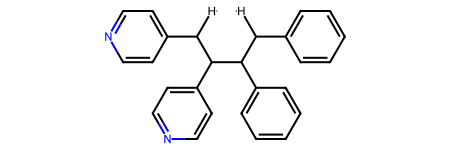

In [36]:
big_smiles_gen(big)

[H]C(c1ccccc1)C(c1ccccc1)C([H])c1ccncc1


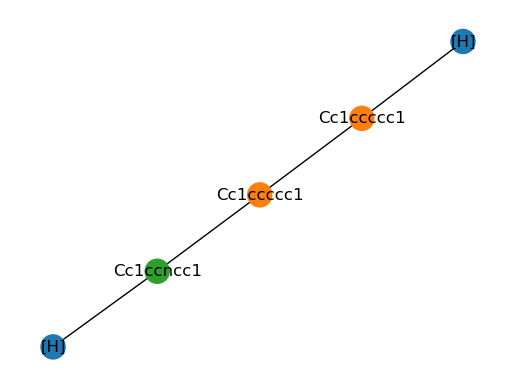

In [37]:
big_smiles_graph(big)

## Polymer in Solvent PS in THF

In [38]:
# big = "C1CCOC1.|10%|{[][$]C([$])c1ccccc1; [$][H][]]}|gauss(400,20)|.|100000|"

In [39]:
# big_smiles_gen(big)

In [40]:
# big_smiles_gen(big)

## Poly(acrylic acid butyl - r - acrylamide) (25% acrylamide)

[H]C(CC(=O)OCCCC)C(CC(N)=O)C(CC(N)=O)C(CC(N)=O)C(CC(=O)OCCCC)C([H])CC(=O)OCCCC


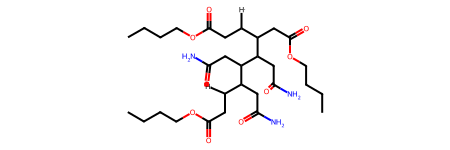

In [41]:
big = "[H]{[>][>|75|]C([<|75|])CC(=O)OCCCC, [<|25|]C([>|25|])CC(=O)N[<]}|gauss(500,50)|[H]"
big_smiles_gen(big)

[H]C(CC(=O)OCCCC)C(CC(=O)OCCCC)C(CC(N)=O)C(CC(=O)OCCCC)C([H])CC(=O)OCCCC


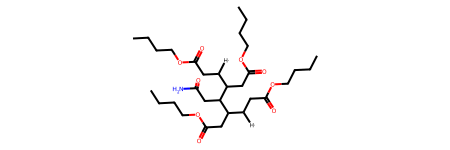

In [42]:
big_smiles_gen(big)

[H]C(CC(N)=O)C(CC(=O)OCCCC)C(CC(N)=O)C(CC(=O)OCCCC)C(CC(=O)OCCCC)C([H])CC(N)=O


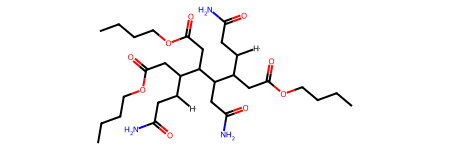

In [43]:
big_smiles_gen(big)

[H]C(CC(N)=O)C(CC(=O)OCCCC)C(CC(N)=O)C(CC(N)=O)C(CC(N)=O)C(CC(=O)OCCCC)C([H])CC(=O)OCCCC


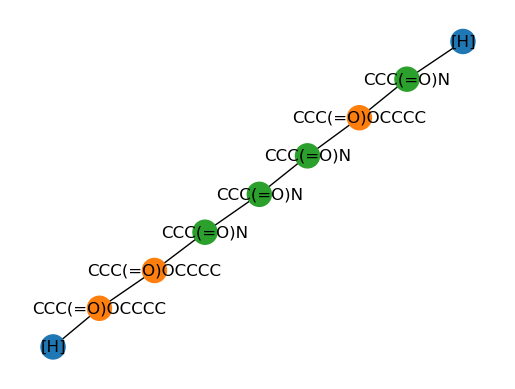

In [44]:
big_smiles_graph(big)

[H]C(CC(=O)OCCCC)C(CC(N)=O)C(CC(N)=O)C(CC(=O)OCCCC)C([H])CC(=O)OCCCC


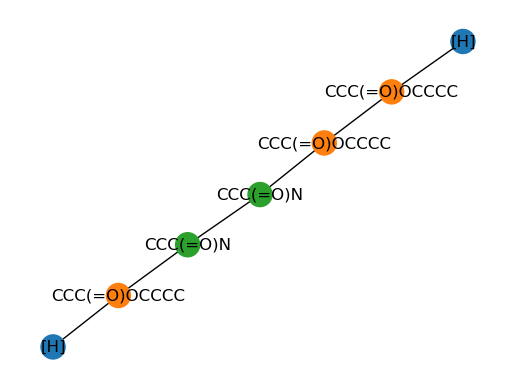

In [45]:
big_smiles_graph(big)

## Vulcanized poly(1,3-butadiene)

[H]CC=CCCC=CCCC([H])C(C[H])SSC(CCC=CCCC(SSSC(C[H])C([H])C[H])C([H])CCC([H])C([H])C[H])C(C[H])SSC(CCC=CCCC([H])C([H])CCC([H])C([H])C[H])C(CCC=CCCC=CCCC=CCCC=CCCC(SS[H])C([H])CCC([H])C([H])C[H])S[H]


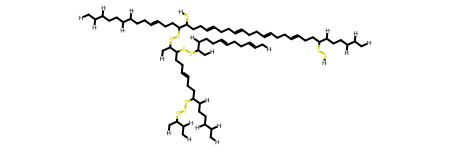

In [46]:
big = "{[][$1|2|]CC=CC[$1|2|], [$1]CC([<])C([<])C[$1], [>]S[$2|10|], [$2]S[$2]; [$1][H], [<][H], [>][H], [$2][H][]}|gauss(1500,500)|"
big_smiles_gen(big)

[H]CC=CCCC=CCCC=CCCC=CCCC(SSC(C[H])C(CCC(SSC(C[H])C(CCC=CCCC=CC[H])SS[H])C([H])CCC([H])C(C[H])SSC(C[H])C([H])C[H])SS[H])C(CCC(SSS[H])C(CCC([H])C([H])C[H])SSC(C[H])C(CCC([H])C([H])C[H])SSC(C[H])C(C[H])SS[H])SSC(CCC=CCCC(SS[H])C(C[H])SSSC(C[H])C([H])C[H])C([H])C[H]


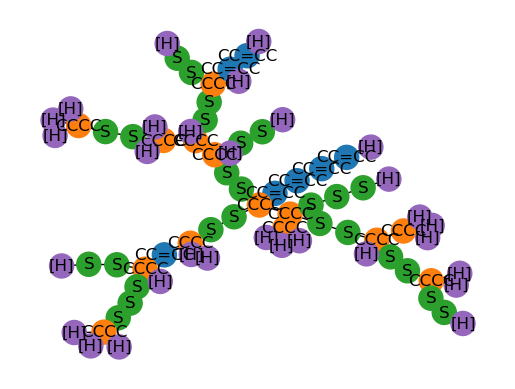

In [47]:
big_smiles_graph(big)

[H]CC=CCCC=CCCC(SS[H])C(CCC=CCCC=CC[H])SSC(CCC=CCCC=CCCC=CCCC=CCCC(SSSSC(C[H])C([H])C[H])C(C[H])SSC(CCC=CCCC(SS[H])C([H])CCC(SSC(CCC=CC[H])C([H])CCC=CC[H])C(C[H])SSC(C[H])C([H])C[H])C(CCC=CCCC([H])C([H])C[H])SSC(C[H])C([H])C[H])C(CCC=CC[H])SS[H]


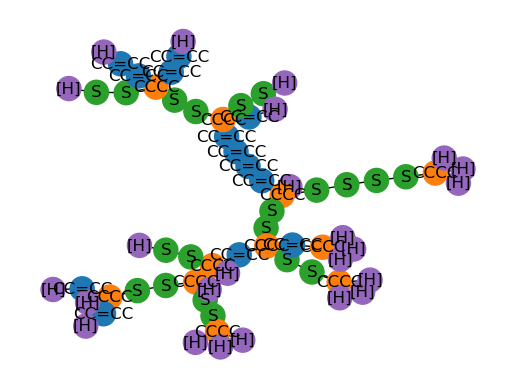

In [48]:
big_smiles_graph(big)

# Example stochastic polymer

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCC(CCCCC(CCCCCCCCCCCCCCCCCCCC(CCCCC(CCCOC)CCOC)CCOC)CCCCCCCCC(CCCCCCCCCCF)CC(COC)c1ccccc1)c1ccccc1


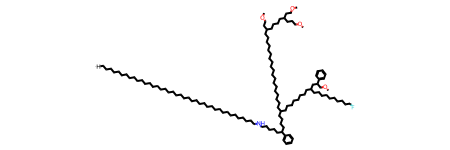

In [49]:
big = "F{[<] [<|3|]CC[>|3|],[<]C([>])c1ccccc1, [<|0.5|]CCC(C[>|0.1|])CC[>|0.5|]; [<]COC, [>][H] [>]}|uniform(500,1000)|CN{[$][$]CC[$][$]}|uniform(400,500)|[H]"
big_smiles_gen(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCC(CCCCCCCCC(CCCCCC(CCCCF)c1ccccc1)CCCCC(CCCCC(CCOC)CCC(CCC(COC)c1ccccc1)c1ccccc1)CCOC)c1ccccc1


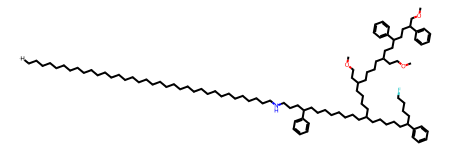

In [50]:
big_smiles_gen(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCCCCCCC(c1ccccc1)C(CCCCC(CCCCC(F)c1ccccc1)CCOC)c1ccccc1


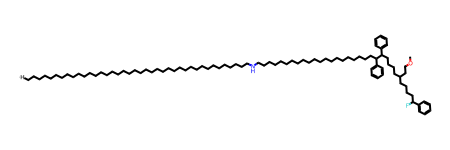

In [51]:
big_smiles_gen(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCC(CCC(CCCCCCF)CCCCCCCC(CCCCCCCCC(CCC(COC)c1ccccc1)c1ccccc1)CCCC(CCOC)CCC(c1ccccc1)C(CCCCCCCOC)c1ccccc1)c1ccccc1


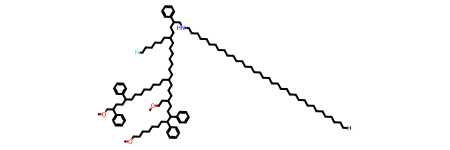

In [52]:
big_smiles_gen(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCC(CCCCC(c1ccccc1)C(CCCCCCC(CCCCCCCCC(COC)c1ccccc1)CCCC(CCOC)CCC(F)c1ccccc1)c1ccccc1)c1ccccc1


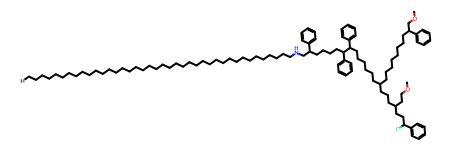

In [53]:
big_smiles_gen(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCC(CCCCCCC(CCCCCCCCC(CF)CCCCCCCCCCCCCCC(CCCCOC)CCCCC(CCC(CCCCC(CCCOC)CCOC)CCOC)c1ccccc1)c1ccccc1)c1ccccc1


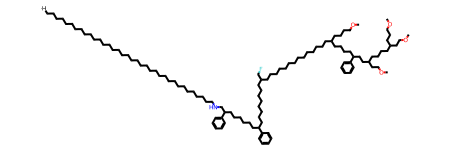

In [54]:
big_smiles_gen(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCC(CCCCCCCCCCC(CCCOC)CC(CCC(CCC(F)c1ccccc1)c1ccccc1)c1ccccc1)CCOC


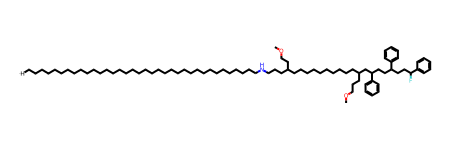

In [55]:
big_smiles_gen(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCC(CCCCCCCCC(CCCCF)CCCCCCCC(CCCCCCCCCCC(CCC(CCCCC(CCCOC)CCOC)CCOC)c1ccccc1)c1ccccc1)CCOC


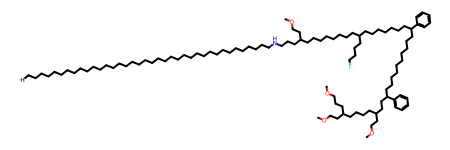

In [56]:
big_smiles_gen(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCC(CCCCCCCCC(CCOC)CCC(CCCCC(c1ccccc1)C(CCCCCCCCCCCCCCC(CCCCCCCCCCCCF)CCOC)c1ccccc1)c1ccccc1)c1ccccc1


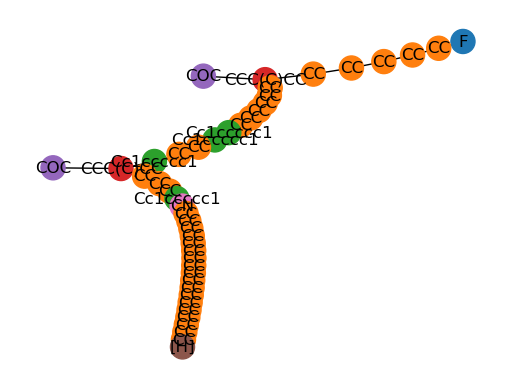

In [57]:
big_smiles_graph(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCC(CCCCCCCCCCC(CCCCCCCCC(CCCCCOC)CCOC)CC(CCC(CCCCCCCCCCC(CCCCC(CCF)c1ccccc1)CCOC)c1ccccc1)c1ccccc1)c1ccccc1


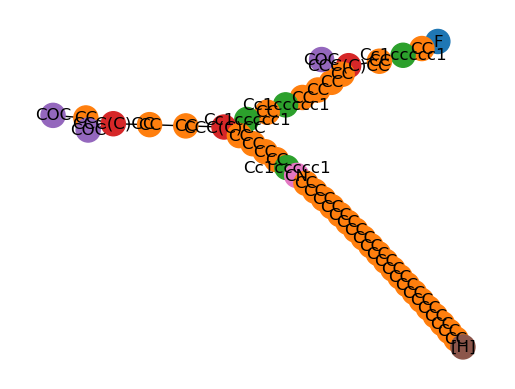

In [58]:
big_smiles_graph(big)

[H]CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCC(CCCCCCC(CCCCCCC(CCC(CCCCCCC(CCCCF)c1ccccc1)c1ccccc1)c1ccccc1)CCOC)c1ccccc1


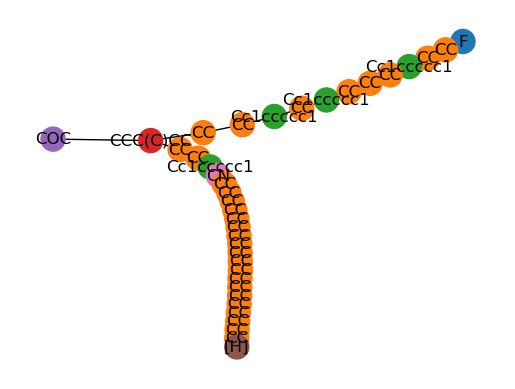

In [59]:
big_smiles_graph(big)

# Motifs

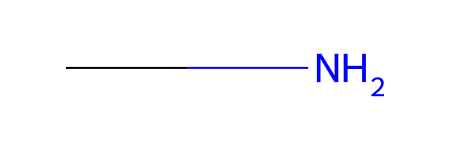

In [60]:
render_svg(moltosvg(Chem.MolFromSmiles("NC")))

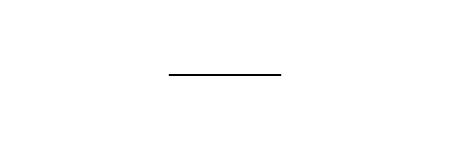

In [61]:
render_svg(moltosvg(Chem.MolFromSmiles("CC")))

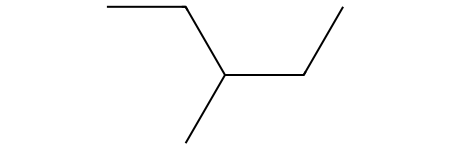

In [62]:
render_svg(moltosvg(Chem.MolFromSmiles("CCC(C)CC")))

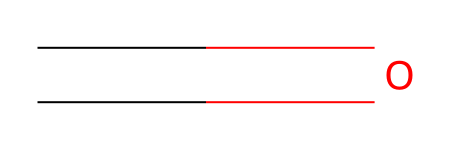

In [63]:
render_svg(moltosvg(Chem.MolFromSmiles("C=O")))

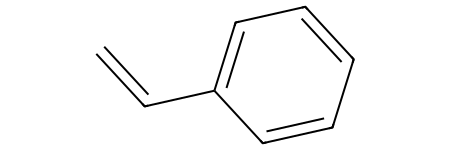

In [64]:
render_svg(moltosvg(Chem.MolFromSmiles("C=Cc1ccccc1")))

[H]C(c1ccccc1)C([H])c1ccccc1


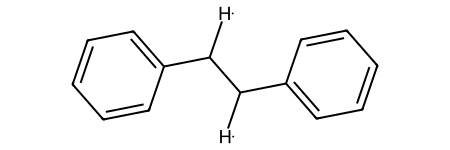

In [65]:
big = "{[] [<]C([>])c1ccccc1 ; [H][>], [H][<] []}|uniform(100, 200)|"
big_smiles_gen(big)

[H]C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C(c1ccccc1)C([H])c1ccccc1


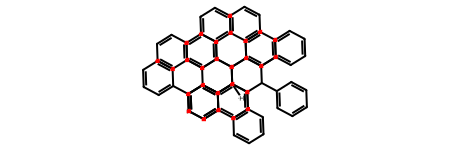

In [66]:
big = "{[] [<]C([>])c1ccccc1 ; [H][>], [H][<] []}|uniform(500, 1000)|"
big_smiles_gen(big)

[H]NC(C=O)CC(CCCCCCO)N[H]


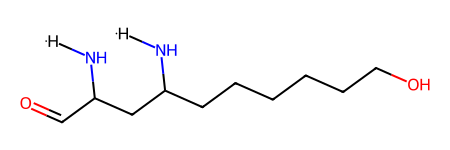

In [67]:
big = "OC{[<] [<]CC[>], [<|.5|]C(N[>|.1 0 0 0 0 0|])C[>]; [<][H] [>]}|flory_schulz(5e-3)|C=O.|5000|"
big_smiles_gen(big)

[H]NC(C=O)CC(CCCC(CC(CCCCCCCCCCO)N[H])N[H])N[H]


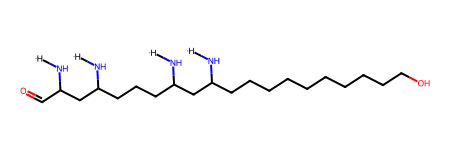

In [68]:
big_smiles_gen(big)

[H]CC(CCNC(CCCC(CCCCCCCCO)N[H])NC(C[H])CC(C=O)N[H])N[H]


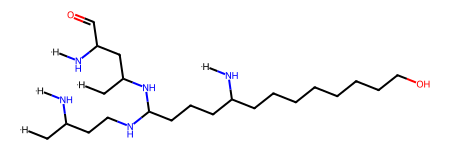

In [69]:
big_smiles_gen(big)

[H]CC(CCCCCC(CCNC(CC(CCCC(CC(C=O)N[H])N[H])N[H])CC(CC(CCO)N[H])N[H])N[H])N[H]


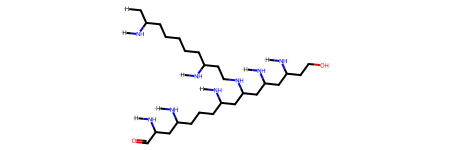

In [70]:
big_smiles_gen(big)

[H]CCCCNC(CCCCCCO)CCCCCCCC(C=O)N[H]


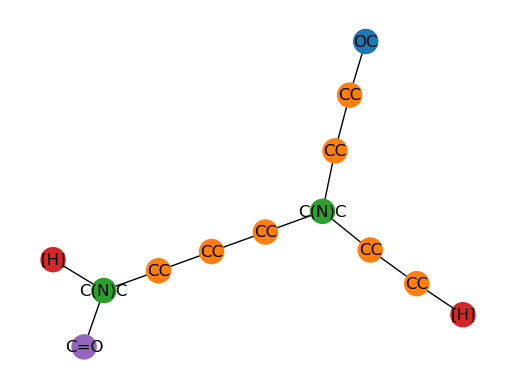

In [71]:
big_smiles_graph(big)

[H]NC(CCO)CCCC(CC(CCC=O)N[H])N[H]


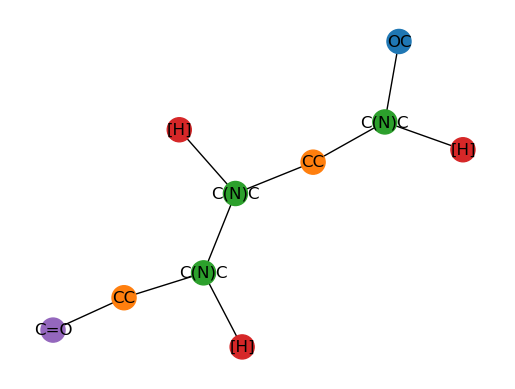

In [72]:
big_smiles_graph(big)

In [73]:
big = (
    "O=C{[<]CC(C)NC(=O)C([<|10|])C[>|10|], CCCCOC(=O)C([<|90|])C[>|90|] [>]}|flory_schulz(5e-3)|CC"
)

CCCCOC(=O)C(CC)CC(CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC


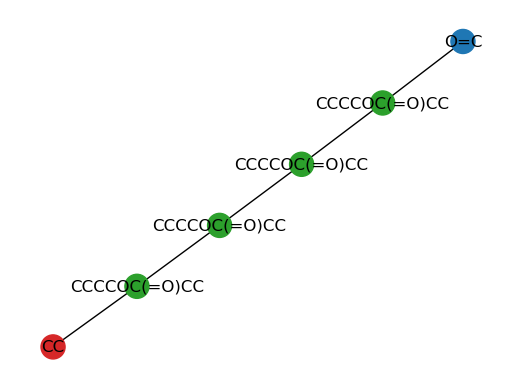

In [74]:
big_smiles_graph(big)

CCCCOC(=O)C(CC)CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC


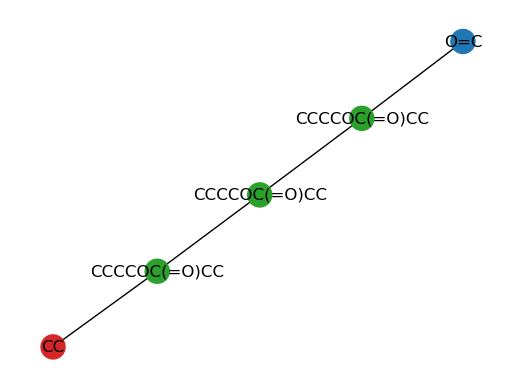

In [75]:
big_smiles_graph(big)

CCCCOC(=O)C(CC)CC(CC(CC(CC(CC(CC(CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC


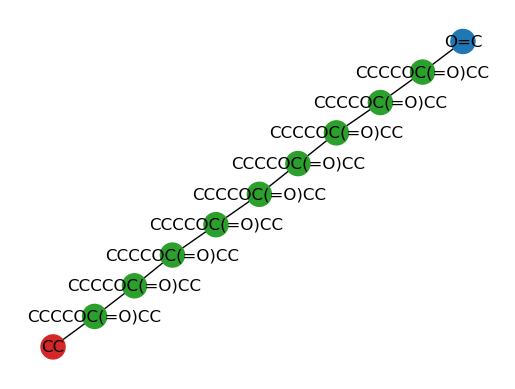

In [76]:
big_smiles_graph(big)

CCCCOC(=O)C(CC)CC(CC(CC(CC(CC(CC(CC(CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC


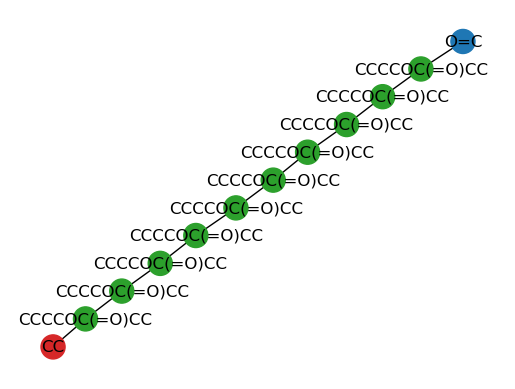

In [77]:
big_smiles_graph(big)

CCCCOC(=O)C(CC)CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC


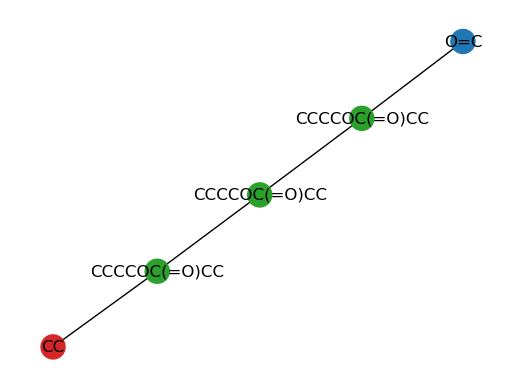

In [78]:
big_smiles_graph(big)

CCCCOC(=O)C(CC)CC(CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC


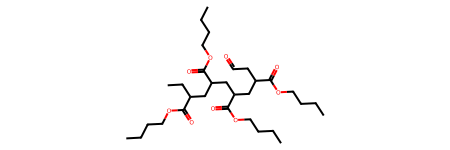

In [79]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC


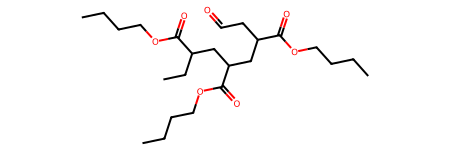

In [80]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC=O)C(=O)OCCCC


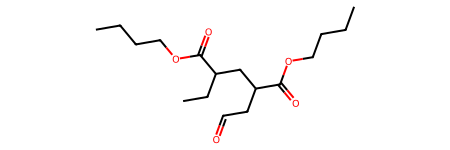

In [81]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC=O


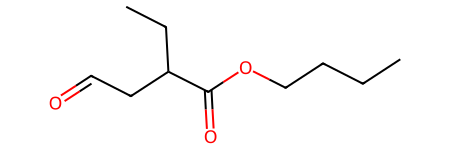

In [82]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC(CC(CC(CC=O)C(=O)NC(C)C)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)NC(C)C


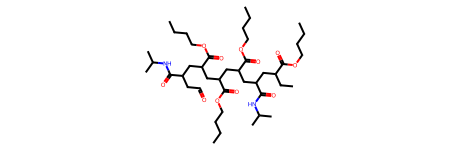

In [83]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC(CC(CC(CC(CC(CC(CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC


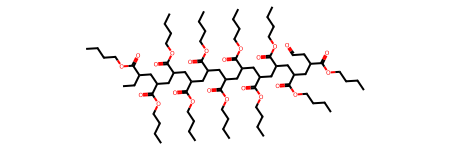

In [84]:
big_smiles_gen(big)

CCCCOC(=O)C(CC=O)CC(CC(CC(CC)C(=O)OCCCC)C(=O)OCCCC)C(=O)NC(C)C


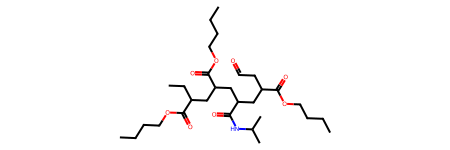

In [85]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC


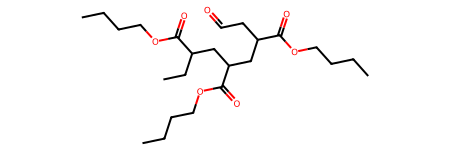

In [86]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC


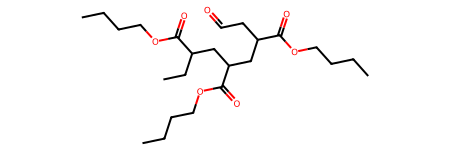

In [87]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC


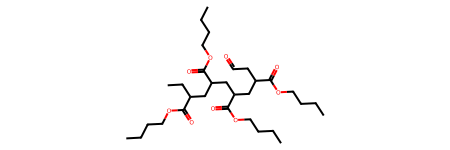

In [88]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC(CC(CC(CC(CC(CC=O)C(=O)NC(C)C)C(=O)OCCCC)C(=O)NC(C)C)C(=O)OCCCC)C(=O)OCCCC)C(=O)OCCCC)C(=O)NC(C)C


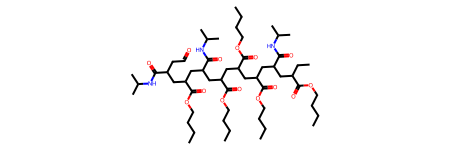

In [89]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC


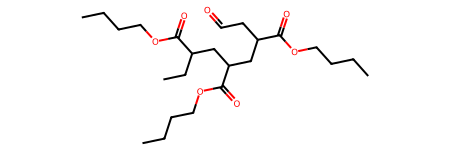

In [90]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC(CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC)C(=O)NC(C)C)C(=O)NC(C)C)C(=O)OCCCC


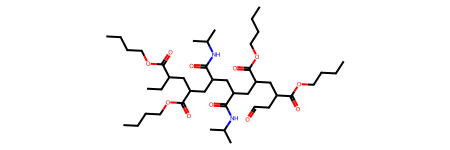

In [91]:
big_smiles_gen(big)

CCCCOC(=O)C(CC)CC(CC(CC=O)C(=O)OCCCC)C(=O)OCCCC


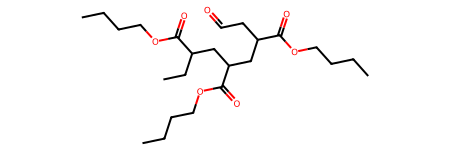

In [92]:
big_smiles_gen(big)

In [93]:
big = "N#CC(C)(C){[$] O([<])(C([$])C[$]), [>]CCO[<|0 0 0 1 0 2|] ; [>][H] [$]}|schulz_zimm(11500,6400)|[H]"

[H]CC(CC(OCCO[H])C(CCC(OCCO[H])C(CC(CC(CC(CC(CC(CCC(CC(CC(CC(CC(OCCOCCO[H])C(CCC(OCCO[H])C(CC(CCC(OCCO[H])C(CCC(CC(OCCOCCO[H])C(CCC(OCCO[H])C(CC(CCC(OCCOCCO[H])C(CCC(CC(OCCO[H])C(CCC(OCCO[H])C(CC(CC(CCC(CC(OCCO[H])C(CC(C)(C)C#N)OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCOCCO[H])OCCOCCO[H])OCCOCCO[H])OCCO[H])OCCOCCOCCOCCOCCO[H])OCCOCCO[H])OCCO[H])OCCOCCO[H])OCCOCCOCCO[H])OCCO[H])OCCOCCOCCO[H])OCCOCCO[H])OCCOCCOCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])O[H]


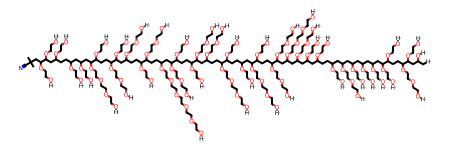

In [94]:
big_smiles_gen(big)

[H]CC(CC(O[H])C(CCC(CC(OCCO[H])C(CCC(OCCOCCO[H])C(CCC(OCCO[H])C(CCC(OCCOCCO[H])C(CC(CC(CCC(CC(CC(CC(CC(CC(CC(CC(CC(OCCOCCO[H])C(CCC(CC(CC(OCCO[H])C(CCC(OCCOCCOCCO[H])C(CC(CC(CCC(CC(CC(CC(OCCO[H])C(CCC(CC(OCCO[H])C(CC(CCC(CC(CC(CC(OCCO[H])C(CC(CC(CC(CCC(OCCO[H])C(CC(CCC(CC(CC(OCCOCCO[H])C(C)(C)C#N)OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCOCCOCCO[H])OCCOCCOCCOCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCOCCOCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCOCCO[H])OCCOCCO[H])OCCOCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])O[H])O[H]


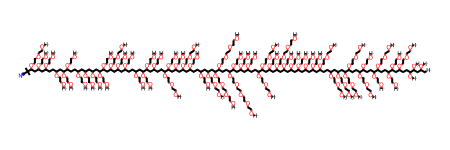

In [95]:
big_smiles_gen(big)

[H]CC(O[H])C(CCC(OCCOCCO[H])C(CC(CCC(OCCO[H])C(CCC(OCCO[H])C(CC(CC(CCC(CC(CC(OCCO[H])C(CC(CC(CCC(OCCO[H])C(CC(CCC(OCCO[H])C(CCC(OCCO[H])C(CC(CCC(CC(CC(CC(CC(CC(CC(CC(CC(OCCO[H])C(CC(CC(CC(CCC(OCCO[H])C(CCC(CC(OCCO[H])C(CCC(OCCOCCO[H])C(CC(CC(CC(CCC(OCCOCCOCCO[H])C(CC(CC(CCC(CC(OCCOCCO[H])C(CC(CCC(CC(OCCO[H])C(CC(CC(CC(CCC(OCCO[H])C(CC(CC(CCC(OCCOCCO[H])C(CC(CC(CCC(CC(OCCOCCOCCO[H])C(CC(CC(CC(CC(CCC(CC(OCCO[H])C(CC(CCC(OCCOCCOCCO[H])C(CCC(OCCO[H])C(CC(CC(CC(CCC(CC(OCCO[H])C(CC(CC(CCC(CC(CC(OCCO[H])C(CC(CCC(CC(CC(CC(OCCOCCOCCOCCO[H])C(CCC(CC(CC(CC(CC(CC(OCCOCCOCCO[H])C(CCC(CC(OCCO[H])C(CCC(OCCOCCOCCO[H])C(CCC(CC(CC(OCCOCCO[H])C(CCC(CC(CC(OCCO[H])C(CC(CCC(CC(OCCO[H])C(CC(CC(CCC(CC(CC(OCCOCCO[H])C(CC(CC(CCC(CC(OCCOCCOCCO[H])C(CCC(CC(OCCO[H])C(CC(CC(CCC(OCCOCCO[H])C(CC(CC(CC(C)(C)C#N)OCCOCCOCCOCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCOCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCOCCO[H])OCCO[H])OCCOCCO[H])OCCOCCOCCOCCO[H])OCCOCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCOCCOCCOCCO[H])OCCO[H]

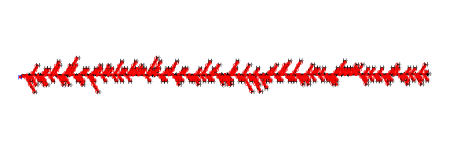

In [96]:
big_smiles_gen(big)

[H]OCCOCCOC(CCC(OCCOCCO[H])C(CCC(CC([H])O[H])OCCO[H])OCCOCCO[H])CC(CC(OCCOCCO[H])C(CC(CCC(OCCO[H])C(CC(CCC(CC(OCCOCCO[H])C(CCC(OCCOCCO[H])C(CCC(OCCO[H])C(C)(C)C#N)OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCOCCO[H])OCCO[H]


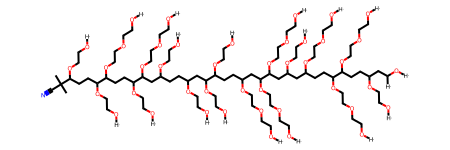

In [97]:
big_smiles_gen(big)

[H]OCCOCCOCCOC(CCC(CC(CC(OCCO[H])C(CC(CCC(OCCO[H])C(CCC(CC(CC(CC(OCCO[H])C(CCC(CC(CC(OCCO[H])C(CC(CC(CCC(OCCO[H])C(CC(CCC(CC(CC(OCCO[H])C(CCC(CC(OCCO[H])C(CC(CCC(CC(OCCO[H])C(CC(CC(C)(C)C#N)OCCO[H])OCCO[H])OCCOCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCOCCOCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])C(CC(CC(CCC(OCCO[H])C(CC(CCC(CC(CC(OCCO[H])C(CC(CCC(CC(CC(CC(CC([H])O[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCO[H])OCCOCCO[H])OCCOCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCO[H])OCCOCCO[H])OCCOCCO[H]


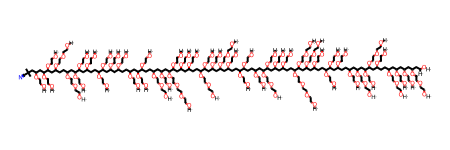

In [99]:
big_smiles_gen(big)